<a href="https://colab.research.google.com/github/IanSkapin/DataAnalytics/blob/main/modeling-and-visualisation/classification/AMaV_4_Probability_finalv2_bc_edit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probability revisited



*   Probability is a statement describing uncertainty.
*   It takes up a value between **0 and 1**.
*   **P=1** means **100%** certainty
*   **P=0** means impossibility and
*   **P=0.5** means there's **50/50** equal chance.



# Bayes Theorem Conditional Probability



![picture](https://drive.google.com/uc?id=1r1SRmsG2r5JkbaeQ1C5bmdm7_qKVSoFU)

![picture](https://drive.google.com/uc?id=1GcTvzOnkBPnA8_YlWGJ6R96FP5sze5WN)

> 🔑 https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_probability/bs704_probability6.html

|           | Diseased | Not Diseased | Total |
|-----------|----------|--------------|-------|
| Test +    | 99       | 99           | 198   |
| Test -    | 1        | 9801         | 9802  |
| Total     | 100      | 9900         | 10000 |


In [1]:
# Raw patient counts
diseased_positive = 99
diseased_negative = 1
not_diseased_positive = 99
not_diseased_negative = 9801

# Calculate total population from the sum of all patient counts
total_population = diseased_positive + diseased_negative + not_diseased_positive + not_diseased_negative

# Calculate probabilities
P_A = (diseased_positive + diseased_negative) / total_population  # Probability of disease
P_B = (diseased_positive + not_diseased_positive) / total_population  # Probability of a positive test
P_B_given_A = diseased_positive / (diseased_positive + diseased_negative)  # Probability of a positive test given disease

# Applying Bayes theorem
P_A_given_B = (P_B_given_A * P_A) / P_B
print(f"Probability of disease given a positive test in Example 1: {P_A_given_B*100}%")


Probability of disease given a positive test in Example 1: 50.0%


In [2]:
!pip install -q gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 40.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 44.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.4/288.4 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.0/137.0 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.9 MB/s eta 0:0

In [3]:
import gradio as gr

def bayes_theorem(P_A: float, P_B_given_A: float, P_B_given_not_A: float):
    # Total population
    total_population = 10000  # For simplicity, let's assume a population of 10,000

    # Patient counts based on prevalence and test reliability
    diseased_positive = int(P_A * P_B_given_A * total_population)
    diseased_negative = int(P_A * (1 - P_B_given_A) * total_population)
    not_diseased_positive = int((1 - P_A) * P_B_given_not_A * total_population)
    not_diseased_negative = int((1 - P_A) * (1 - P_B_given_not_A) * total_population)

    # Calculate probabilities
    P_B = (diseased_positive + not_diseased_positive) / total_population

    # Applying Bayes theorem
    P_A_given_B = (P_B_given_A * P_A) / P_B

    # Construct table and bar chart
    table = f'''
    |             | Diseased | Not Diseased | Total |
    |-------------|----------|--------------|-------|
    | Test +      | {diseased_positive}      | {not_diseased_positive}        | {diseased_positive + not_diseased_positive}     |
    | Test -      | {diseased_negative}      | {not_diseased_negative}        | {diseased_negative + not_diseased_negative}     |
    | Total       | {diseased_positive + diseased_negative}      | {not_diseased_positive + not_diseased_negative}        | {total_population}     |
    '''

    bar_chart_html = f'''
    <style>
    .container {{
      width: 100%;
      background-color: #f3f3f3;
    }}

    .bar {{
      width: {P_A_given_B*100}%;
      background-color: #4CAF50;
      text-align: center;
      color: white;
      padding: 10px 0;
    }}
    </style>
    <h2>Bayesian Probability Visualization</h2>
    <p>This bar represents the probability that you have the disease, given a positive test result, using Bayes' theorem.</p>
    <div class="container">
      <div class="bar">{round(P_A_given_B*100, 1)}%</div>
    </div>
    '''

    return table, bar_chart_html

iface = gr.Interface(
    fn=bayes_theorem,
    inputs=[
        gr.inputs.Slider(0.01, 1, step=0.01, default=0.01, label="Prior probability you have the disease (P_A)"),
        gr.inputs.Slider(0.01, 1, step=0.01, default=0.99, label="Probability of a positive test result given you have the disease (P_B_given_A)"),
        gr.inputs.Slider(0.01, 1, step=0.01, default=0.01, label="Probability of a positive test result given you don't have the disease (P_B_given_not_A)")
    ],
    outputs=[
        gr.outputs.Textbox(),
        gr.outputs.HTML()
    ],
    examples=[
        [0.01, 0.99, 0.01]  # This is an example that corresponds to the default values
    ]
)
iface.launch()


/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:89: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:93: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

### Naive Bayes Classifier for Natural Language Processing.

This follows the example in the Handbook provided on the Hub.

The aim is to train a classifier on a set of movie reviews and then to attempt to classify an unseen review as either positive or negative based on our training corpus.

> 🔑 https://web.stanford.edu/~jurafsky/slp3/4.pdf

> 🔑 https://youtu.be/OhLosjXM-Fg

> 🔑 https://web.stanford.edu/~jurafsky/slp3/

> 🔑 http://varianceexplained.org/r/empirical_bayes_baseball/

In [4]:
# import the dependencies
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
# Create a dataframe to work with.
# Usually we'd import a large dataset of reviews such as the IMDB dataset provided
# in your resources for this week's exercise

# Notice we put all the data in one set as we will split it out during a test / train split

dataset = [["That was a good movie", "positive"],
           ["Nice story, good plot, brave direction", "positive"],
           ["Boring movie, can't stand...", "negative"],
            ["The acting is not great, but the story is brilliant", "positive"],
            ["Rubbish", "negative"],
           ["That was a waste of time", "negative"],
           ["Brilliant, Brave, Bravo", "positive"],
           ["One of the most important movies of a generation", "positive"]]

dataset = pd.DataFrame(dataset)
dataset.columns = ["Text", "Reviews"]
dataset

,Text,Reviews
0,That was a good movie,positive
1,"Nice story, good plot, brave direction",positive
2,"Boring movie, can't stand...",negative
3,"The acting is not great, but the story is bril...",positive
4,Rubbish,negative
5,That was a waste of time,negative
6,"Brilliant, Brave, Bravo",positive
7,One of the most important movies of a generation,positive


In [6]:
# install
!pip install contractions
import contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 10.8 MB/s eta 0:00:00


In [7]:
# examples contraction - text
contractions.fix("wouldn't").lower()


'would not'

In [8]:
# clean text function

def clean_text(text):
    '''
    We are writing a text clean helper function
    '''
    # put text to lower
    text = text.lower()

    # fix contractions
    text = contractions.fix(text).lower()

    # we remove special characters
    digi_punct = "[^a-z]"
    text = re.sub(digi_punct, " ", text)

    # remove double whitespace
    text = " ".join(text.split())

    return text

In [9]:
# apply on text column
dataset['Text_clean'] = dataset['Text'].apply(clean_text)

dataset.head(3)

,Text,Reviews,Text_clean
0,That was a good movie,positive,that was a good movie
1,"Nice story, good plot, brave direction",positive,nice story good plot brave direction
2,"Boring movie, can't stand...",negative,boring movie cannot stand


In [10]:
# stopwords
# import nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

my_stopwords = stopwords.words('english')

print(sorted(stopwords.words('english')))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've", 'shouldn', "shouldn't", 'so', 'some',

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
# create text without stopwords from text_clean

dataset['Text_without_stop'] = dataset['Text_clean'].apply(lambda txt: " ".join([word for word in txt.split() if word not in my_stopwords]))




In [12]:
dataset.head()

,Text,Reviews,Text_clean,Text_without_stop
0,That was a good movie,positive,that was a good movie,good movie
1,"Nice story, good plot, brave direction",positive,nice story good plot brave direction,nice story good plot brave direction
2,"Boring movie, can't stand...",negative,boring movie cannot stand,boring movie cannot stand
3,"The acting is not great, but the story is bril...",positive,the acting is not great but the story is brill...,acting great story brilliant
4,Rubbish,negative,rubbish,rubbish


In [13]:
# stemming function

def stemming(sentence):
    '''
    Function to stem chunks of text
    '''
    stemmer = PorterStemmer()

    stemmed = " ".join([stemmer.stem(word) for word in sentence.split()])

    return stemmed

In [14]:
# example sentence
sentence = 'I am wondering if Facebook"s name change to Meta was their best decision ever!'

In [15]:
stemmed_example = stemming(sentence)
print(stemmed_example)

i am wonder if facebook" name chang to meta wa their best decis ever!


Let us try another possible way to bring words back to their roots - lemmatizing. Notice that lemmatizing does take care some sentiment as we will see below.

In [16]:
# import spacy
import spacy
nlp = spacy.load("en_core_web_sm")

doc = nlp(sentence)

" ".join([token.lemma_ for token in doc])

'I be wonder if Facebook"s name change to Meta be their good decision ever !'

That is very interesting: It did not only bring each words to its roots but even converted:
- I -> PRON
- am -> be
- best -> good

In [17]:
dataset.head()

,Text,Reviews,Text_clean,Text_without_stop
0,That was a good movie,positive,that was a good movie,good movie
1,"Nice story, good plot, brave direction",positive,nice story good plot brave direction,nice story good plot brave direction
2,"Boring movie, can't stand...",negative,boring movie cannot stand,boring movie cannot stand
3,"The acting is not great, but the story is bril...",positive,the acting is not great but the story is brill...,acting great story brilliant
4,Rubbish,negative,rubbish,rubbish


In [18]:
# map stemming function

dataset["Text_stemming"] = dataset["Text_without_stop"].map(stemming)

In [19]:
dataset.head(7)

,Text,Reviews,Text_clean,Text_without_stop,Text_stemming
0,That was a good movie,positive,that was a good movie,good movie,good movi
1,"Nice story, good plot, brave direction",positive,nice story good plot brave direction,nice story good plot brave direction,nice stori good plot brave direct
2,"Boring movie, can't stand...",negative,boring movie cannot stand,boring movie cannot stand,bore movi cannot stand
3,"The acting is not great, but the story is bril...",positive,the acting is not great but the story is brill...,acting great story brilliant,act great stori brilliant
4,Rubbish,negative,rubbish,rubbish,rubbish
5,That was a waste of time,negative,that was a waste of time,waste time,wast time
6,"Brilliant, Brave, Bravo",positive,brilliant brave bravo,brilliant brave bravo,brilliant brave bravo


In [20]:
# lemmatization function

def lemmatization(sentence):

  doc = nlp(sentence)
  return " ".join([token.lemma_ for token in doc])

In [21]:
# map lemmatization function

dataset["Text_lemma"] = dataset["Text_without_stop"].map(lemmatization)

In [22]:
dataset.head()

,Text,Reviews,Text_clean,Text_without_stop,Text_stemming,Text_lemma
0,That was a good movie,positive,that was a good movie,good movie,good movi,good movie
1,"Nice story, good plot, brave direction",positive,nice story good plot brave direction,nice story good plot brave direction,nice stori good plot brave direct,nice story good plot brave direction
2,"Boring movie, can't stand...",negative,boring movie cannot stand,boring movie cannot stand,bore movi cannot stand,boring movie can not stand
3,"The acting is not great, but the story is bril...",positive,the acting is not great but the story is brill...,acting great story brilliant,act great stori brilliant,act great story brilliant
4,Rubbish,negative,rubbish,rubbish,rubbish,rubbish


In [24]:
print(dataset.iloc[:, 1])

0    positive
1    positive
2    negative
3    positive
4    negative
5    negative
6    positive
7    positive
Name: Reviews, dtype: object


In [25]:
# creating bag of words model  with the countvectorizer
cv = CountVectorizer(max_features = 1500)

X = cv.fit_transform(dataset['Text_lemma']).toarray()

y = dataset.iloc[:, 1]


In [26]:
# examine x

print(type(X))
print(X.shape)

<class 'numpy.ndarray'>
(8, 21)


In [27]:
print(X)
print(y)

[[0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0]
 [0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0]
 [1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
 [0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0]]
0    positive
1    positive
2    negative
3    positive
4    negative
5    negative
6    positive
7    positive
Name: Reviews, dtype: object


In [28]:
# iloc
dataset.iloc[0]["Text_lemma"]

'good movie'

In [29]:
# print
print(X[0])

[0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0]


In [30]:
# Stemmer Corpus get feature names
for pos, word in enumerate(X[0]):
  print(f"{cv.get_feature_names_out()[pos]}: {X[0, pos]}")


act: 0
boring: 0
brave: 0
bravo: 0
brilliant: 0
can: 0
direction: 0
generation: 0
good: 1
great: 0
important: 0
movie: 1
nice: 0
not: 0
one: 0
plot: 0
rubbish: 0
stand: 0
story: 0
time: 0
waste: 0


In [31]:
# splitting the data set into training set and test set
from sklearn.model_selection import train_test_split


# we will create 2 instances in the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

X_test

array([[0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0]])

In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

# Create a MultinomialNB object
classifier = MultinomialNB()

# Fit the model to the training data
classifier.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = classifier.predict(X_test)

# Print the predicted labels
print(y_pred)


['positive' 'negative']


In [33]:
len(X_test)

2

In [34]:
print(y_pred)

['positive' 'negative']


In [35]:
print(dataset.iloc[6, 0])

Brilliant, Brave, Bravo


In [36]:
print(dataset.iloc[2, 0])

Boring movie, can't stand...


In [37]:
y_test

6    positive
2    negative
Name: Reviews, dtype: object

In [38]:
# Stemmer Corpus

for pos, word in enumerate(X_test[1]):
  print(f"{cv.get_feature_names_out()[pos]}: {X_test[1, pos]}")

act: 0
boring: 1
brave: 0
bravo: 0
brilliant: 0
can: 1
direction: 0
generation: 0
good: 0
great: 0
important: 0
movie: 1
nice: 0
not: 1
one: 0
plot: 0
rubbish: 0
stand: 1
story: 0
time: 0
waste: 0


In [39]:
# making the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1, 0],
       [0, 1]])

In this example we can see we got one False Negative and one True Negative





In [40]:
classifier.classes_

array(['negative', 'positive'], dtype='<U8')

In [41]:
# create class labels

class_labels = ['Negative', 'Positive']

df_cm = pd.DataFrame(data = confusion_matrix(y_test, y_pred),
                     index = [x + "_Real" for x in class_labels],
                     columns = [x + "_Predicted" for x in class_labels])

In [42]:
df_cm

,Negative_Predicted,Positive_Predicted
Negative_Real,1,0
Positive_Real,0,1


In [43]:
dataset.head(3)

,Text,Reviews,Text_clean,Text_without_stop,Text_stemming,Text_lemma
0,That was a good movie,positive,that was a good movie,good movie,good movi,good movie
1,"Nice story, good plot, brave direction",positive,nice story good plot brave direction,nice story good plot brave direction,nice stori good plot brave direct,nice story good plot brave direction
2,"Boring movie, can't stand...",negative,boring movie cannot stand,boring movie cannot stand,bore movi cannot stand,boring movie can not stand


In [ ]:
df_cm

,Negative_Predicted,Positive_Predicted
Negative_Real,1,0
Positive_Real,0,1


Precision = TP / TP + FP

Recall = TP / TP + FN

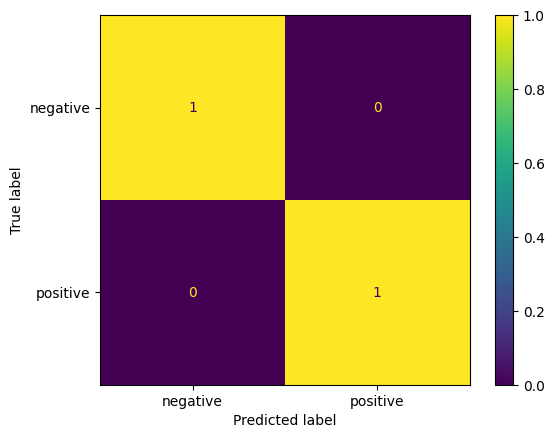

In [ ]:
# visualising result
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)

disp.plot()

plt.show()

In [ ]:
# compute accuracy score
from sklearn.metrics import accuracy_score
print("Accuracy")
print(accuracy_score(y_test, y_pred))


Accuracy
1.0


Great resource for model evaluation with visuals:

https://www.scikit-yb.org/en/latest/api/classifier/class_prediction_error.html

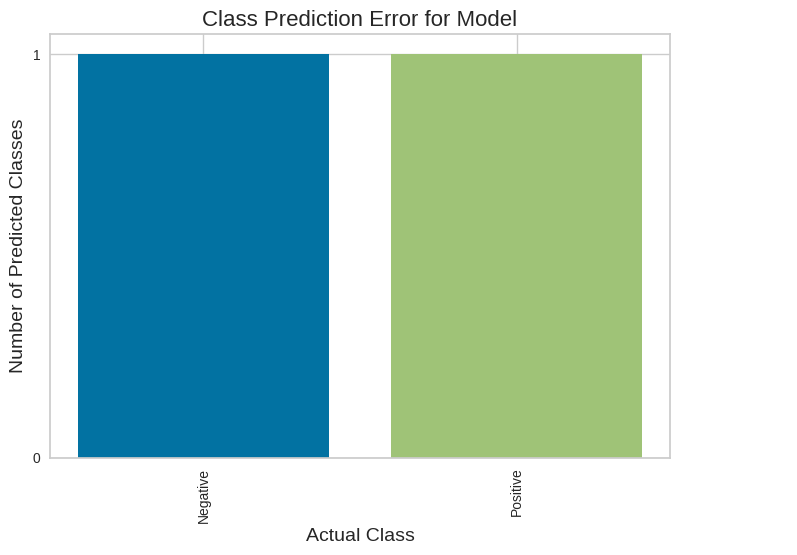

In [ ]:
# title
from yellowbrick.classifier import ClassPredictionError
from matplotlib.ticker import MultipleLocator

# Instantiate the classification model and visualizer
visualizer = ClassPredictionError(
    classifier, classes=class_labels
)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

plt.xlabel("Actual Class", size=14)
plt.ylabel("Number of Predicted Classes", size=14)
plt.title('Class Prediction Error for Model', size=16)
plt.legend(loc="right", bbox_to_anchor=(1.2,1))
plt.gca().xaxis.set_major_locator(MultipleLocator(1))
plt.gca().yaxis.set_major_locator(MultipleLocator(1))

### References

Grus, J. (2019). Data Science from Scratch, Second Edition. ISBN: 978-1-492-04113-9.



# Consolidation Extension

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder, OrdinalEncoder


df = pd.read_csv('https://raw.githubusercontent.com/luiseduardogfranca/students-performance/master/StudentsPerformance.csv')

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
!pip install -q https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     / 22.6 MB 21.2 MB/s 0:00:02
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 42.5 MB/s eta 0:00:00


In [ ]:
import pandas_profiling as pp

pp.ProfileReport(df, minimal=True)

<ipython-input-49-e5efd1a30f6b>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

ValueError: ignored

In [ ]:
# label binarizer

X = df.loc[:, ["gender", "race/ethnicity", "parental level of education", "lunch", "test preparation course"]]
y = df.loc[:, ["math score"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("  training set:", X_train.shape[0])
print("  testing set:", X_test.shape[0])

  training set: 800
  testing set: 200


In [ ]:
print(df.columns)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


In [ ]:
# encode

X_train_enc = X_train.copy()
X_test_enc = X_test.copy()

# binarizer
cols = ['gender', 'test preparation course', 'lunch']

for c in cols:
    binarizer = LabelBinarizer().fit(X_train[c])
    X_train_enc[c] = binarizer.transform(X_train[c])
    X_test_enc[c] = binarizer.transform(X_test[c])


print(X_train)
print(X_train_enc)

     gender race/ethnicity parental level of education         lunch  \
213    male        group C          associate's degree  free/reduced   
757    male        group E           bachelor's degree  free/reduced   
412    male        group D          associate's degree      standard   
30   female        group D                some college      standard   
120  female        group C           bachelor's degree      standard   
..      ...            ...                         ...           ...   
971    male        group C            some high school      standard   
268  female        group D          associate's degree      standard   
939    male        group D            some high school      standard   
481  female        group D          associate's degree  free/reduced   
519  female        group B                 high school  free/reduced   

    test preparation course  
213               completed  
757               completed  
412                    none  
30             

In [ ]:
X_train_enc.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course
213,1,group C,associate's degree,0,0
757,1,group E,bachelor's degree,0,0
412,1,group D,associate's degree,1,1
30,0,group D,some college,1,1
120,0,group C,bachelor's degree,1,0


In [ ]:
print(df['parental level of education'].unique())

["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


In [ ]:
df[['parental level of education']].head()

,parental level of education
0,bachelor's degree
1,some college
2,master's degree
3,associate's degree
4,some college


In [ ]:
# ordinal encoder

column = "parental level of education"

categories = ['some high school', 'high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"]

ord_encoder = OrdinalEncoder(categories=[categories]).fit(X_train[[column]])

X_train_enc[column] = ord_encoder.transform(X_train[[column]])
X_test_enc[column] = ord_encoder.transform(X_test[[column]])

In [ ]:
X_train_enc.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course
213,1,group C,3.0,0,0
757,1,group E,4.0,0,0
412,1,group D,3.0,1,1
30,0,group D,2.0,1,1
120,0,group C,4.0,1,0


In [ ]:
help(pd.get_dummies)

Help on function get_dummies in module pandas.core.reshape.encoding:

get_dummies(data, prefix=None, prefix_sep='_', dummy_na: 'bool' = False, columns=None, sparse: 'bool' = False, drop_first: 'bool' = False, dtype: 'Dtype | None' = None) -> 'DataFrame'
    Convert categorical variable into dummy/indicator variables.
    
    Parameters
    ----------
    data : array-like, Series, or DataFrame
        Data of which to get dummy indicators.
    prefix : str, list of str, or dict of str, default None
        String to append DataFrame column names.
        Pass a list with length equal to the number of columns
        when calling get_dummies on a DataFrame. Alternatively, `prefix`
        can be a dictionary mapping column names to prefixes.
    prefix_sep : str, default '_'
        If appending prefix, separator/delimiter to use. Or pass a
        list or dictionary as with `prefix`.
    dummy_na : bool, default False
        Add a column to indicate NaNs, if False NaNs are ignored.
 